# <center>**OrientDB VS Neo4J : la guerre des graphes**<u></center> 

### <center>Auteurs : Chassagnon - Fischer - Sow </center> 

<img src="pilotes_img.jpg" width="1100" height="400">

### Outline
####  Introduction
#### 1. OrientDB une base de donnée multimodèle 
  > ##### a. Présentation de la base de donnée 
  > ##### b. Installation et premiers pas 
#### 2. Comparaison avec Neo4J
  > ##### a. Notre approche (présenter le dataset ici)
  > ##### b. Création des bases de données
  > ##### c. Requêtes
#### 3. Conclusion sur la comparaison et Limites de notre approche
####  Conclusion générale 

# <u>**Introduction**<u>

<div style="text-align: justify"> Le big data, cette technologie révolutionnaire qui va changer nos vies. C'est en ces termes qu'est présenté ce concept né fin des années 90 aux États-unis. Ce terme est en effet maintenant devenu un "buzz word" utilisé à tout va dans les sphères médiatiques et dans le marketing pour attirer l'attention ou susciter l'engouement autour de technologies qui dans la majorité des cas ne sont pas totalement maîtrisées. Cependant, derrière ce terme se cache des solutions certes innovantes mais qui dépassent la simple traduction littérale de "grosses masses de données" qu'on lui attribue. Elle n'est en réalité pas seulement liée au volume de données mais aussi et surtout à la variété de celles-ci (leur hétérogénéité), la vélocité à laquelle elle nous parviennent, leur valeur et véracité. On parle des cinq V du big data. 
L'écosystème du big data a notamment fait sa révolution grâce à l'évolution des architectures informatiques et à la création de la technique de MapReduce par google (dans le framework Hadoop). Mais aussi au changement de paradigme que représente le passage des bases de données relationnées utilisant le language SQL (Structured query Language) aux systèmes NoSQL (Not Only SQL). Malgré la domination du SQL qui reste le type de base de donnée prépondérant, nous assistons à l'émergence du NoSQL propulsé notamment par la dynamique de nouvelles start-up qui sont souvent rachetés par les géants "traditionnels" du big data que sont Oracle, IBM, Google. 
Parmi ces technologies NoSQL, nous distinguons notamment les bases de données de type graphes qui stockent la donnée sous forme de graphes en liant des neouds (Nodes - Vertex) grâce à des relations (Links - Edges). Elle sont très utilisées par les géants du net comme Facebook ou Twitter pour représenter les relations qui existent entre les utilisateurs. 
Dans cet exposé, nous allons présenter un système de gestion de base de données (SGBD) de type graphe OrientDB en le comparant notamment à un SGBD orienté graphe concurrant Neo4J. Nous utiliserons leurs "drivers" python que sont respectivement pyrorient and py2neo. </div>

## 1. <u>**OrientDB une base de donnée multimodèle**<u>

### a. Présentation de la base de donnée 

OrientDB a vu le jour en 2010 grâce à Luca Garulli. OrientDB a très vite revendiqué le titre de premier SGBD multimodèle marquant, selon son créateur, la nouvelle révolution du NoSQL. Multimodèle ici se référe au fait que OrientDB a été réfléchie pour pouvoir notamment gérer à la fois des données de type graphes, documents et clés-valeurs. Ce qui marque une certaine révolution. 
Sa particularité est qu'elle inclue une couche du language SQL. Cependant, au lieu de parcourir les relations (edges) grâce à des jointures (une des plus importante feature du SQL), des liens (Links) sont utilisés. Il s'agit de liaisons directes par enregistrement d’un pointeur vers l’objet. Ce qui la différencie des SGBD relationnels. Cela conduit à une récupération rapide de données reliées par rapport aux jointures dans un Système de Gestion de Base de Données (SGBD) qui pour nous est un hybride Relationnel-Graphe. Nous évoquerons dans la suite de l'exposé cette dernière comme une SGBD-G. 
De tous les types de stockage de données évoqués ci-dessus, le type graphe utilisé aussi par Neo4J est décrit dans la littérature comme le plus structurant en NoSQL (VERGNES, 2015). L'essence même de la donnée est ici conservée. 

<img src="graph_eg.png" width="800" height="400">

<center> Figure 1 : Exemple de SGBD orienté graphe </center> 

Les SGBD graphes ont comme évoquée une gestion des données basée sur des nœuds (les individus divers), possédant un certain nombre de propriétés (informations), reliés entre eux par des arêtes (edges). Les graphes peuvent gérer des modèles très connectés avec une grande quantité de données en gardant leur structure au niveau du réseau ainsi formé. Elles utilisent les propriétées de la théorie des graphes ..................

Écrite en Java, OrientDB s’appuie sur une communauté open source pour se développer, dirigée par OrientDB LTD qui est une filiale de SAP. Cette dernière l'a acquise après le rachat de CallidusCloud en 2018. La stratégie de SAP concernant OrientDB a été claire dès le rachat. La structure resterait assez indépendante, l'équipe maintenue et le développement open source. Ainsi, vous pouvez contribuer facilement à OrientDB et dialoguer avec l'équipe [ici](https://github.com/orientechnologies/orientdb).
Elle possède toutes les fonctions natives d’un graph data base avec la flexibilité et la rapidité d’un document store (OrientDB).
Plusieurs versions d’OrientDB existent, une version entreprise et une autre communautaire. Nous traiterons ici seulement de cette dernière, gratuite.

### b. Installation et premiers pas 

#### Installation

Nous détaillerons dans cette partie l'installation et la mise en place de la base de donnée. Nous utiliserons de la documentation issues principalement de notre expérience personnelle avec OrientDB, ainsi que le [MOOC de Udemy sur OrientDB](https://www.udemy.com/join/login-popup/?next=/course/orientdb-getting-started/learn/lecture/1726168#overview) et le [site officiel d’OrientDB](www.orientdb.org). Toutes ces étapes ne concernent de plus que la version gratuite (appelée Community Edition) disponible sous licence Apache2 (utilisation et distribution à des fins personnels, académiques et commerciales sans restriction). 

Prérequis : OrientDB nécessite de posséder les systèmes d'exploitation qui peuvent implémenter une machine virtuelle Java : 
- Microsoft Windows 95/NT et versions postérieures, 
- Mac OS X, 
- Linux,
- Solaris...
Mais aussi d'avoir une version de Java ultérieure à 1.7. Lors de notre première prise en main, nous avons constaté que même certaines versions ultérieures avaient du mal a être supporté par OrientDB. Nous conseillons si vous rencontrez des problèmes d'execution du fichier orientDB de désinstaller complétement Java et de réinstaller l'ensemble du JDK 8.  

L’installation est très simple et comporte 3 étapes principales : 
Téléchargement // Décompression - Unzip // Lancement
 
-          Télécharger et installer Java :  https://www.java.com/fr/ (version offline) s’il n’est pas déjà présent sur la machine
-          Télécharger OrientDB selon le système d’exploitation : https://www.orientdb.org/download
-          Décompresser/unzip le dossier, renommer le dossier de version en orientdb

Pour obtenir le JDK 8 vous pouvez directement consulter le [site d'Oracle](https://www.oracle.com/fr/java/technologies/javase/javase-jdk8-downloads.html). Aussi, si vous désirez installer le Code source, vous pouvez le faire [ici](https://orientdb.com/docs/2.2.x/Tutorial-Installation.html). 

Après avoir téléchargé sur votre ordinateur OrientDB et bien vérifié avoir la version de Java, vous pourrez suivre les instructions suivantes pour finaliser votre installation. 
### <center><font color='red'>Mac OS X </font> - <font color='orange'>Windows</font> - <font color='red'>Linux </font> </center> 


-  Ouvrir l’invite de commande :<br>
 > <font color='orange'>Démarrer et rechercher l’invite de commande </font> <br>
 > <font color='red'>Clic droit sur le fichier server.sh du dossier orientdb et l’ouvrir avec Terminal </font> 
 
-  Changer le répertoire de travail au sous dossier bin du dossier orientdb. <br>
Pour le dossier sur le bureau : <br>
 > <font color='orange'>C:\Users\Axel>cd Desktop\orientdb\bin </font> <br>
 > <font color='red'> MacBook-Pro-de-Ibrahima:bin ibrahimasow$  ~/Desktop/orientdb/bin</font> 
 
- Lancer le serveur OrientDB : <br>
 > <font color='orange'> C:\Users\Axel\Desktop\orientdb\bin>server.bat </font> <br>
 > <font color='red'> MacBook-Pro-de-Ibrahima:bin ibrahimasow$ ./server.sh </font> 




<img src="orient-terminal.png" width="1100" height="400">

<center> Figure 2 : Lancement du server OrientDB à partir du terminal </center> 

#### Lancer le serveur

Si besoin, autorisez l’accès aux réseaux à Java. Lorsque cela est demandé saisissez votre mot de passe pour autoriser l'installation de la base de donnéee. <br>
Pour lancer le serveur OrientDB, il vous faut :
   - lancer le fichier ./server.sh depuis votre invite de commande (terminal sur mac ou linux)
   - sur votre navigateur ouvrir votre localhost sur le 2480. Vous pouvez faire cela à l'adresse suivante : http://localhost:2480/studio/index.html#/ <br>
   
<u>**Remarque**</u> : Notez que OrientDB Studio (le desktop de la base de donnée) se trouve au niveau du port 2480. Nous verrons plus tard que pour se connecter avec le driver Python il faudra utiliser le port 2424. 
Vous tomberez sur la page d'accueuil de votre base de donnée. Vous êtes prêt, à vous maintenant de changer le monde avec de magnifiques graphes.

<img src="lp_orientdb.png" width="1100" height="400">

<center> Figure 3 : Vue de la page de connexion du serveur local d'OrientDB Desktop </center> 

Vous pourrer vérifier à l'aide de requête simple si tout est OK en accédant à la base de donnée créée par défaut (demodb). Vous pourrez par exemple requêter toute la table Profiles grâce à la commande suivante: **SELECT * FROM Profiles**.
Notez que 3 utilisateurs (admin, reader et writer) sont créés par défaut par OrientDB à chaque création de base de donnée. Veuillez de plus à garder précieusement votre code de connexion, il est unique pour l'ensemble de les bases de données que vous administrerez. En cas d'oublie, il vous faudra suivre une procédure assez fastidieuse qui implique d'altérer les fichiers configurations (nous vous conseillons de ne pas tenter ces opérations qui peuvent aboutir à une défection de certaines fonctions importantes).  

#### Utiliser un driver

OrientDB a comme évoqué été pensée et construire avec du Java pur, elle utilise SQL comme language de requête (mais aussi XXX) mais ce qui en fait un outil assez apprécié dans la communauté est qu'elle a dès ses débuts permis le développement de "drivers" (des programmes informatiques qui implémentent un protocole pour se connecter à une base de donnée). Ainsi, plusieurs développeurs extérieurs au projet ont programmé des interfaces de connection avec les langagues les plus populaires. On retrouve un driver Java (le plus actif et maintenu) mais aussi et surtout un driver Python appelé [Pyorient](https://github.com/mogui/pyorient). 
Pyorient s'installe facilement avec l'outil de gestion de packages de python pip. Il est nécessaire d'avoir une version de Python ultérieure au 2.7 (la plupart des ordinateurs étant déjà équipé de Python 2.7. Nous vous conseillons cependant d'utiliser Python 3 (>=3.7 étant l'idéal) pour pouvoir pleinement des possibilités de ce driver. 
- Installation de Pyorient : sur votre invite de commande (terminal) : <font color='pink'> **pip install pyorient** </font> <br>
- pour importer pyorient dans votre IDE :  <font color='pink'> **import pyorient**</font> <br>

## 2. <u> **Comparaison avec Neo4J**

#### <center> @versions : Python : 3.7  //  Pyorient = 1.5.5  // Py2neo = 2020.0.0  //   OrientDB = 3.1.4 //   Neo4J : 4.1.1 // Sous Mac Catalina et Windows 7</center> 

<center> Disclaimer : Notre travail porte sur les versions citées ci-dessus, nos conclusions peuvent donc différer de celles d'autres travaux.</center> 

> #### a. Notre approche

 > #### - Stratégie

Afin de présenter au mieux OrientDB et de le comparer à Neo4J, nous avons choisi de le faire sur une stratégie comparative bien définie. Nous avons effet, chosii de travailler à deux sur cette partie. Un de nous à travailler uniquement avec OrientDB/pyOrient et un autre uniquement avec Neo4J/py2neo. Le but étant de partir d'un même jeu de donnée (  celui des Championnats du monde de Formule 1 de 1950 à 2020), construire pour chacun la base de donnéee de son côté avec PyOrient pour l'un et Py2neo pour l'autre. Ensuite, les mêmes requêtes sont faites pour chacune des bases de donnéee. Enfin, chacun partage son expèrience à l'autre et essaie de comprendre en quoi la technologie qu'il a utilisé est meilleure ou moins performant par rapport à l'autre. 
Nous avons de plus décidé d'un nombre de critères bien défini qui nous semble pertinent pour une bonne utilisation d'une base de donnée orientée graphe. 

 > #### - Jeu de données 

Le jeu de données, disponible sur [kaggle](https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020), regroupe l'ensemble des informations relatives au déroulé et aux résultats des Grands Prix de Formule 1 depuis 1950. On y retrouve des informations sur les écuries (constructors), les épreuves de qualification (qualifying), les pilotes (drivers), les courses (races), les temps (laps stops)… Dans un soucis de cohérence avec les questions qui nous intéresse et d'adaptation de ce jeu de données aux capacités de nos ordinateurs, nous avons choisi de ne travailler que sur les tables suivantes : Constructors - Drivers - Races - Circuits - Results. Ces tables sont à elles seules suffisantes pour prendre en main OrientDB et Neo4J et réaliser au mieux la comparaison. Aussi, parce qu'il s'agit de données assez importantes, toutes ces tables sont reliées entre elles par des clés étrangers très pertinent dans les bases de données relationnelles. Nous allons voir qu'elles servent aussi énormément en NoSQL. La figure 4 présente contenu de chaque table. Aussi, dans un souci de simplification et de focalisation sur l'essentiel, nous n'allons extraire de chaque table que des variables qui nous semblent pertinentes e.g : Pour Drivers code et dob (date-of-birth) ne seront pas utilisées pour construire nos bases de données. 

<img src="dtst.png" width="1100" height="400">

<center> Figure 4 : Overview de notre jeu de donnée </center> 

> #### b. Création des bases de données

Dans cette partie, nous détaillons la création et de XXX de notre base de donnée. En accord avec l'approche que nous avons adopté et présenté en 2.a chacun de nous va réalise cette étape l'étudiant 1 avec OrientDB et le 2 avec Neo4J. Pour chacune de cees deux technologies le même cheminement est suivi à savoir la création des noeuds (Nodes, Vertex) et celle des relations (Edges). 

   > - ## Sur OrientDB

Nous procédons d'abord à l'importation de l'ensemble des librairies nécessaires. Le driver Pyorient se décline dans sa forme usuelle qui utilise pour dialoguer avec le serveur Orientdb en tant que client. Il existe aussi un module PyOrient OGM pour "Object-Graph Mapper for PyOrient" qui offre une interface de haut niveau (par rapport au dialogue avec la machine) pour les bases de données de type Graphe. Nous n'utiliserons ici que le module Pyorient. Nous importons de même les packages qui nous permettrons de mener à bien nos process de "data wrangling". 

In [52]:
import pyorient 
from pyorient.ogm import *
from csv import *
import pandas as pd
import numpy as np
import time as tm
import seaborn as sns
import psutil 

Sur Pyorient avec de dialoguer avec le serveur il est nécessaire de créer un client (une sorte de session). 

In [53]:
client = pyorient.OrientDB("localhost", 2424)
sessionToken = client.get_session_token()
client.set_session_token(True)
session_id = client.connect("root", "merlin") # root correspond ici à notre id admin et merlin le mot de passe pour accéder au serveur

A partir de ce client nous créer notre base de données Formula1.

In [54]:
#client.db_create(
 # "Formula1",
  # pyorient.DB_TYPE_GRAPH,
   # pyorient.STORAGE_TYPE_PLOCAL)

In [55]:
client.db_open("Formula1", "root", "merlin");

Pyorient offre plusieurs commandes très simples et intuitives pour vérifier sa connexion, avoir quelques infos auprès du serveur. vous pouvez les retrouver [ici](https://orientdb.com/docs/2.2.x/PyOrient-Client.html). Nous affichons ci-dessous la liste des bases de données disponibles côté serveur ainsi que la taille de celle que  nous venons d'ouvrir. 

In [56]:
dblist = client.db_list()
dblist

In [57]:
client.db_size()

18570079

Nous procédons ci-dessous à la création des noeuds de notre de données. Dans le vocabulaire d'OrientDB un noeud correspond à un VERTEX. Mathématiquement cela est très logique vu que cela correspond à un sommet en géométrie. Python étant un language orienté objet, nous utiliserons dans la partie ci-dessous plusieurs attributs et méthodes. Cette caractéristique de python fait qu'il soit très adapté à une base de donnée orienté graphe. En effet, ici aussi on parle de classes et d'objets. 

#### Création des noeuds 

 > ####  Données écuries :  Constructors

In [8]:
debut = tm.time()
path_to_data = "/Users/ibrahimasow/Desktop/formula_1/"
file= open(path_to_data+'constructors.csv','r')
constructors = pd.read_csv(file)
constructors = constructors.rename(columns={"name": "cons_name", "nationality": "cons_nationality"})
constructors 

,constructorId,constructorRef,cons_name,cons_nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,212,alpha_tauri,Scuderia Alpha Tauri,Italian,http://en.wikipedia.org/wiki/Scuderia_Alpha_Tauri


In [8]:
constructorId = constructors['constructorId'].to_list()
constructorRef = constructors['constructorRef'].to_list()
cons_name = constructors['cons_name'].to_list()
cons_nationality = constructors['cons_nationality'].to_list()

La méthode command() permet d'écrire et d'éxécuter des requêtes qui sont comme il est possible de le constater ci-dessous du SQL. Une alternative à command est query : 
    client.query("CREATE Class Constructors EXTENDS V")

In [9]:
client.command("CREATE Class Constructors EXTENDS V")

[22]

Nous avons constaté avec l'utilisation de Pyorient que le client avit tendance à se déconnecter du serveur en perdant ainsi son token (traduction littérale : jeton; comme une clef donnant l'autorisation à notre client de se connecter). Nous avons donc décidé avant chaque grosse requête de set (mettre) notre token. 

In [177]:
client.set_session_token(True); # ; pour ne pas voir l'output dans notre notebook

Nous avons aussi constaté que pour certaines requêtes le temps de dialogue minimal (de 30s) instauré par les développeurs du package ne suffisait pas. Nous avons donc décider d'outre-passer cette limite temporelle en la fixant à 150s. Si vous utilisez ce feature évitez par contre de mettre un temps beaucoup trop long; cela risquerait de vous envoyer dans des infinite loops (des itérations à l'infini de votre programmation et un crash de votre ordinateur).

In [ ]:
import socket
socks = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
socks.settimeout(150.0) # set timeout is the attr of socks.

Afin d'envoyer notre neoud au serveur nous avons choisi d'utiliser l'une des fonctionalités les plus intéressantes d'OrientDB que repréesente le Batch. Le Batch en informatique est une technique qui permet une automatisation d'une suite de commandes exécutées en série sur un ordinateur sans qu'il soit nécessaire qu'un opérateur intervienne pour réaliser cette opération ([JDN, 2020](https://www.journaldunet.fr/web-tech/dictionnaire-du-webmastering/1203563-batch-definition-traduction/#:~:text=Le%20terme%20batch%20d%C3%A9signe%20en,expression%20%22traitement%20par%20lots%22.)). Les process Batch permettent ainsi en Big data d'optimiser la performance lorsque des tâches répétitives comme présentées ci-dessous sont à réaliser. Dans notre, plus commandes SQL ne différant que d'un charactère (les Id) est à réaliser. Nous initialisons donc notre commande batch. 

In [21]:
# Initialize Batch Commands Array
batch_cmds = ['begin']

Nous réalisons les itérations nécessaires et affectons les commandes SQL unitaires à la liste précédemment initialisée.  

In [22]:
for a, b in zip(range(len(cons_name)), constructorId):
    command = ("CREATE VERTEX Constructors "
               "SET constructorId = '%s', constructorRef = '%s', cons_name ='%s', cons_nationality ='%s'"
          % (b,
             constructorRef[a],
             cons_name[a],
             cons_nationality[a]
            ))
    batch_cmds.append(command)
# Add Batch Commit
batch_cmds.append('commit retry 100;')

Nous séparons chaque commande unitaire par un ; (séparateur de commande usuel en SQL).

In [24]:
# Join with Semicolons
cmd = ';'.join(batch_cmds)

Et exécutons la commande Batch. 

In [25]:
# Execute Commands
results = client.batch(cmd)

Sans ce procédé, la tâche que nous venons d'éxécuter n'aurait pas pu se faire (crash répétitifs de notre connexion client-serveur) 

Nous répétons cette technique pour chacune des autres jeu de données à notre disposition. 

> #### Données circuit :  Circuits

In [9]:
file= open(path_to_data+'circuits.csv','r')
circuits = pd.read_csv(file)
circuits = circuits.rename(columns={"name": "circuits_name"})
circuits

,circuitId,circuitRef,circuits_name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,\N,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,\N,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,\N,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,\N,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
71,72,port_imperial,Port Imperial Street Circuit,New Jersey,USA,40.77690,-74.01110,\N,http://en.wikipedia.org/wiki/Port_Imperial_Str...
72,73,BAK,Baku City Circuit,Baku,Azerbaijan,40.37250,49.85330,\N,http://en.wikipedia.org/wiki/Baku_City_Circuit
73,74,hanoi,Hanoi Street Circuit,Hanoi,Vietnam,21.01660,105.76600,\N,http://en.wikipedia.org/wiki/Hanoi_Street_Circuit
74,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,\N,http://en.wikipedia.org/wiki/Algarve_Internati...


In [10]:
circuitId = circuits['circuitId'].to_list()
circuits_name = circuits['circuits_name'].to_list()
location = circuits['location'].to_list()
country = circuits['country'].to_list()
lat = circuits['lat'].to_list()
lng = circuits['lng'].to_list()

In [12]:
client.set_session_token(True)

In [31]:
client.command("CREATE Class Circuits EXTENDS V")
# Initialize Batch Commands Array
batch_cmds = ['begin']
for a, b in zip(range(len(circuitId)), circuitId):
    command = ("CREATE VERTEX Circuits "
               "SET circuitId = '%s',name ='%s', location ='%s', country='%s', lat='%s', lng='%s'"
          % (b,
             circuits_name[a],
             location[a],
             country[a],
             lat[a],
             lng[a]
            ))
    batch_cmds.append(command)
    # Add Batch Commit
batch_cmds.append('commit retry 100;')
# Join with Semicolons
cmd = ';'.join(batch_cmds)
# Execute Commands
results = client.batch(cmd)

> #### Données courses :  Races

In [11]:
file= open(path_to_data+'races.csv','r')
races = pd.read_csv(file)
races = races.rename(columns={"name": "races_name"})
races

,raceId,year,round,circuitId,races_name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
...,...,...,...,...,...,...,...,...
1030,1043,2020,13,21,Emilia Romagna Grand Prix,2020-11-01,12:10:00,https://en.wikipedia.org/wiki/2020_Emilia_Roma...
1031,1044,2020,14,5,Turkish Grand Prix,2020-11-15,10:10:00,https://en.wikipedia.org/wiki/2020_Turkish_Gra...
1032,1045,2020,15,3,Bahrain Grand Prix,2020-11-29,15:10:00,https://en.wikipedia.org/wiki/2020_Bahrain_Gra...
1033,1046,2020,16,3,Sakhir Grand Prix,2020-12-06,17:10:00,https://en.wikipedia.org/wiki/2020_Sakhir_Gran...


In [12]:
raceId = races['raceId'].to_list()
year = races['year'].to_list()
round = races['round'].to_list()
circuitId = races['circuitId'].to_list()
races_name = races['races_name'].to_list()
date = races['date'].to_list()

In [60]:
client.set_session_token(True)

In [42]:
client.command("CREATE Class Races EXTENDS V")
# Initialize Batch Commands Array
batch_cmds = ['begin']
for a, b, c, d, e in zip(range(len(raceId)), raceId, year, round, circuitId):
    command = ("CREATE VERTEX Races "
               "SET raceId = '%s', year = '%s', round ='%s', circuitId ='%s', races_name='%s', date='%s'"
          % (b, c, d, e,
             races_name[a],
             date[a]
            ))
    batch_cmds.append(command)
# Add Batch Commit
batch_cmds.append('commit retry 100;')
# Join with Semicolons
cmd = ';'.join(batch_cmds)
# Execute Commands
results = client.batch(cmd)

> #### Données pilotes : Drivers

In [13]:
file= open(path_to_data+'drivers.csv','r')
drivers = pd.read_csv(file)
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
843,845,sirotkin,35,SIR,Sergey,Sirotkin,1995-08-27,Russian,http://en.wikipedia.org/wiki/Sergey_Sirotkin_(...
844,846,norris,4,NOR,Lando,Norris,1999-11-13,British,http://en.wikipedia.org/wiki/Lando_Norris
845,847,russell,63,RUS,George,Russell,1998-02-15,British,http://en.wikipedia.org/wiki/George_Russell_%2...
846,848,albon,23,ALB,Alexander,Albon,1996-03-23,Thai,http://en.wikipedia.org/wiki/Alexander_Albon


In [14]:
drivers['surname'] = drivers['surname'].str.replace("d'Orey",'dOrey')
drivers['surname'] = drivers['surname'].str.replace("d'Ambrosio",'dAmbrosio')
drivers['surname'] = drivers['surname'].str.replace("O'Connor",'OConnor')
drivers['surname'] = drivers['surname'].str.replace("O'Brien",'OBrien')

drivers = drivers.replace(to_replace =r"\N", 
                 value ="NA") 
driverId = drivers['driverId'].to_list()
driverRef = drivers['driverRef'].to_list()
number = drivers['number'].to_list()
code = drivers['code'].to_list()
forename = drivers['forename'].to_list()
surname = drivers['surname'].to_list()
nationality = drivers['nationality'].to_list()

In [52]:
client.command("CREATE Class Drivers EXTENDS V")
# Initialize Batch Commands Array
batch_cmds = ['begin']
for a, b in zip(range(len(driverId)), driverId):
    command = ("CREATE VERTEX Drivers "
               "SET driverId = '%s', driverRef = '%s', forename ='%s', surname= '%s', nationality= '%s'"
          % (b,
             driverRef[a],
             forename[a],
             surname[a],
             nationality[a]
            ))
    batch_cmds.append(command)
# Add Batch Commit
batch_cmds.append('commit retry 100;')
# Join with Semicolons
cmd = ';'.join(batch_cmds)
# Execute Commands
results = client.batch(cmd)

> #### Données résultats : Results

In [17]:
file= open(path_to_data+'results.csv','r')
results = pd.read_csv(file)
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24855,24861,1042,825,210,20,19,16,16,16,0.0,65,\N,\N,63,16,1:21.460,205.632,11
24856,24862,1042,154,210,8,18,17,17,17,0.0,65,\N,\N,59,17,1:21.664,205.118,11
24857,24863,1042,849,3,6,20,18,18,18,0.0,64,\N,\N,53,19,1:21.859,204.629,12
24858,24864,1042,826,213,26,13,19,19,19,0.0,64,\N,\N,59,8,1:20.449,208.216,12


In [19]:
results = results.replace(to_replace =r"\N", 
                 value ="NA") 

resultId = results['resultId'].to_list()
raceId = results['raceId'].to_list()
driverId = results['driverId'].to_list()
constructorId = results['constructorId'].to_list()
grid = results['grid'].to_list()
position = results['position'].to_list()
positionOrder = results['positionOrder'].to_list()
points = results['points'].to_list()
laps = results['laps'].to_list()
time = results['time'].to_list()
rank = results['rank'].to_list()
statusId = results['statusId'].to_list()

In [64]:
client.command("CREATE Class Results EXTENDS V")
batch_cmds = ['begin']
for a, b, c,d, e, f,g,h,i, in zip(resultId, raceId, driverId, constructorId, position, positionOrder, points, rank, statusId):
    command = ("CREATE VERTEX Results "
               "SET resultId = '%s', raceId = '%s', driverId ='%s', constructorId ='%s',position= '%s', positionOrder='%s', points= '%s',rank='%s' , statusId= '%s'"
          % (a,b,c,d,e,f,g,h,i
            ))
    batch_cmds.append(command)
    
batch_cmds.append('commit retry 100;')
# Join with Semicolons
cmd = ';'.join(batch_cmds)
# Execute Commands
results = client.batch(cmd)

### Création des relations

Après avoir créée nos noeuds, il est maintenant temps de les relier les uns aux autres grâce à des relations. Pour ce jeu de données nous avons réfléchi aux relations les plus pertinentes possibles et avons défini les suivantes : 
-  Races <font color='red'>**took_place_on** </font> Circuits : Relation course s'est passé dans circuit
-  Results <font color='red'>**results_of**</font> Races : Relation résultat de la course
-  Driver result on Race; <font color='red'>**d_results**</font> : Relation résultat du pilote 
-  Constructor result on Race; <font color='red'>**c_results**</font> : Relation résultat de l'écurie 
-  Pilote <font color='red'>**participated_to**</font> Race : Relation pilote a participité à la course 

La création de relations entre noeuds dans orientdb n'est cependant à notre avis pas très intuitif. En effet, comme évoqué dans la présentation du SGBD bien qu'OrientDB accpete SQL comme language de requête, elle ne permet pas de faire des jointures de tables (ce qui est très utilise lorsque le dataset est constitué de plusieurs tables liées les unes aux autres par des clés étrangers). A la place, des "LINKS" sont proposés (ce serait selon l'équipe de développement plus en phase avec l'esprit NoSQL :( . 
Afin de créer ces liens entre tables (noeuds) nous avons donc opté pour une stratégie assez peu orthodoxe mais très logique au vu de notre dataset. Nous avons en effet le caractère central de la table Results (où on retrouve tous les clés étrangers) et avons bouclé sur l'ensemble de ces données afin de crééer nos relations. 
Nous avons de plus dans un soucis d'optimisation utilisé la méthode Batch avec le même principe évoqué précédemment. 
La création de ces fameuses "edges" nécessite en SQL de créer des liens du type : <font color='orange'> ..FROM Vertex X To Vertex Y... </font> <br>
Dans les chunks ci-dessous vous trouverez les codes correspondant à la création de relations entres nodes. 

> #### Relation course s'est passé dans circuit : Races took_place_on Circuits

In [373]:
client.command("CREATE Class took_place_on EXTENDS E") # Course s'est passé au Circuit 

[29]

In [69]:
# Initialize Batch Commands Array
batch_cmds = ['begin']

In [70]:
for i, j in zip(races["raceId"], races["circuitId"]):
    command = ("CREATE EDGE took_place_on FROM (SELECT * FROM Races WHERE raceId = %s) TO " 
          "(SELECT * FROM Circuits WHERE circuitId = %s)"
    %(i,
      j
    ))
    batch_cmds.append(command)

In [71]:
# Add Batch Commit
batch_cmds.append('commit retry 100;')

In [72]:
# Join with Semicolons
cmd = ';'.join(batch_cmds)

In [73]:
# Execute Commands
results = client.batch(cmd)

> #### Relation result de la course : Results results_of Races

In [22]:
client.command("CREATE Class results_of EXTENDS E") # Driver/Constructeur result for a Course
# Initialize Batch Commands Array
batch_cmds = ['begin']
for i, j in zip(results["resultId"], results["raceId"]):
    command = ("CREATE EDGE results_of FROM (SELECT * FROM Results WHERE resultId = %s) TO " 
          "(SELECT * FROM Races WHERE raceId = %s)"
    %(i,
      j
    ))
    batch_cmds.append(command)
    # Add Batch Commit
batch_cmds.append('commit retry 100;')
# Join with Semicolons
cmd = ';'.join(batch_cmds)
# Execute Commands
results = client.batch(cmd)

> #### Relation résultat du pilote : Driver result on Race; d_results

In [ ]:
client.command("CREATE Class d_results EXTENDS E") # Driver result for a Race
batch_cmds = ['begin']
for i, j in zip(results["driverId"], results["resultId"]):
    command = ("CREATE EDGE d_results FROM (SELECT * FROM Drivers WHERE driverId = %s) TO " 
          "(SELECT * FROM Results WHERE resultId = %s)"
    %(i,
      j
    ))
    batch_cmds.append(command)
# Add Batch Commit
batch_cmds.append('commit retry 100;')
# Join with Semicolons
cmd = ';'.join(batch_cmds)
# Execute Commands
results = client.batch(cmd)

> #### Relation résultat de l'écurie : Constructor result on Race; c_results 

In [ ]:
client.command("CREATE Class c_results EXTENDS E") # Constructeur result for a Race
batch_cmds = ['begin']
for i, j in zip(results["constructorId"], results["resultId"]):
    command = ("CREATE EDGE c_results FROM (SELECT * FROM Constructors WHERE constructorId = %s) TO " 
          "(SELECT * FROM Results WHERE resultId = %s)"
    %(i,
      j
    ))
    batch_cmds.append(command)
# Add Batch Commit
batch_cmds.append('commit retry 100;')
# Join with Semicolons
cmd = ';'.join(batch_cmds)
# Execute Commands
results = client.batch(cmd)

> #### Relation pilote a participité à la course : Pilote participated to Race

In [21]:
client.command("CREATE Class participated_to EXTENDS E") # Driver/Constructeur a participé à Course
batch_cmds = ['begin']
for i, j in zip(results["driverId"], results["raceId"]):
    command = ("CREATE EDGE participated_to FROM (SELECT * FROM Drivers WHERE driverId = %s) TO " 
          "(SELECT * FROM Races WHERE raceId = %s)"
    %(i,
      j
    ))
    batch_cmds.append(command)
# Add Batch Commit
batch_cmds.append('commit retry 100;')
# Join with Semicolons
cmd = ';'.join(batch_cmds)
# Execute Commands
results = client.batch(cmd)

In [ ]:
end = time.time()
print("La création de la base de donnée avec pyOrient a nécessité" + " " + str(round(end - start, 2)) + "s")

Orientdb propose une alternative pour crééer une base de donnée. Il est effet possible d'utiliser la méthode ETL. Le principe est créer sa base de base à partir d'un fichier JSON en trois étapes : Extract - Transform - Load. Dans la première étape, le jeu de donnée est extraite à partir de sa source, dans la deuxième les données sont transformées afin de correspondre à nos attentes. Il est ainsi possible dans cette de crééer des noeuds et de relations. La dernière étape permet de charger les données dans la base de donnée cible. Cette méthode est extrêmement intéressante lorsque l'on travaille avec un volume de données important. Nous avons essayé cette alternative proposéee par Orientdb et avons constaté une prise en main assez rapide dès lors qu'on a compris le principe général de l'ETL. Cette méthode comparéee à l'envoie de données à partir de Python est beaucoup plus rapide et adapté au Big Data. Ceci même comparé aux commandes Batch que nous avons réalisé ci-dessus. <br>
Pour faire de l'ETL avec Orientdb il est nécessaire de disposer d'un éditeur de texte adapté (nous recommendons Sublime Text ou Visual Studio Code). Vous trouverez le principe de l'ETL avec Orientdb dans la documentation du SGBD [ici](https://orientdb.com/docs/2.2.x/ETL-Introduction.html) et un exemple détaillant bien chaque étape [ici](https://orientdb.com/docs/2.2.x/Import-the-Database-of-Beers.html). La figure 5 montre les commandes JSON que nous avons utilisé pour l'ETL des données sur les courses (Races).  

<img src="races_etl.png" width="1100" height="400">

<center> Figure 5 : ETL sur données des pilotes  </center> 

Nous calculons ici le coût en termes de mémoir de cette étape de création de la base de donnée sous OrientDB.

In [154]:
memory_use_orient = psutil.virtual_memory()[2] # percent – the percentage usage that is calculated as (total – available) / total * 100

   > - ## Sur Neo4J

Dans cette partie, la phase de création de la base de donnée est aussi réalisée aeveec Neo4J. Pour cela, nous utilisons le Driver py2neo qui contrairement à pyorient posséde des modules Graph, Node et Relationship qui sont d'une très grande aide pour définir sans effort supplémentaire les noeuds et relations entre eux.

In [14]:
from py2neo import Graph, Node, Relationship
from  py2neo.ogm import *

Pour commencer, il est nécessaire dans Neo4j de lancer une nouvelle base de donnée (selon nos recherches py2neo ne permettant pas de créer directement une base de donnée).  Le code Python ne fera que injecter des données et des relations créées dans une base Neo4j. 
Nous avons donc en amont :
-  Ouvrir Neo4j et créer une nouvel base locale intitulée "Formula_1"
-  avec mot de passe : Neo4j
-  La demarrer 
-  et l'ouvrir <br>

Pour se cconnecter à la base de donnée, il faut se connecter au port 7687 du serveur localhost. Notez qu'il faut dans certains cas préciser littéralement l'adresse localhost (bolt://127.0.0.1). 

In [15]:
graph_db = Graph("bolt://127.0.0.1:7687", auth=("neo4j", "merlin")) # Nous nous connectons avec commme admin id : neo4j et comme mot de passe : merlin (oui oui lui même !)
# graph_db.run("MATCH (n) DETACH DELETE n") Cette commande nettoie la base de donnée de tout ce qu'elle contient. ELle permet de s'assurer qu'on parte d'une base de donnée vide. 

Comme avec pyorient, nous allons dans un premier temps nous construirons les noeuds à partir de nos documents csv. Pour ensuite créer les relations entre nos noeuds

In [34]:
start2 = tm.time() # Pour mesurer le mis pour créer la base de donnée avec Neo4J. 

### Création des noeuds (neo4j)

La création des tables correspond aux noeuds. Nous montrerons ici comment créer une table dans Neo4j à partir d'un document csv (écuries). La méthode est ensuite la même pour toutes les tables. 

> #### Données écuries :  Constructors

Le principe consiste à créer une table vide puis, en bouclant, introduire chaque ligne de notre document csv comme part du noeud principal 'constructor'.    
Py2neo créera ainsi les tables dans Neo4j à partir du fichier csv transformé en pandas dataframe. Pour eviter toutes erreurs d'importation dues aux caratères spéciaux, on rajoute errors = "ignore", encoding='uft-8'.Le principe de la boucle est relativement simple: la fonction l.split permet de diviser le fichier csv en différentes colonnes en lui précisement le caractère de spération utilisé dans le fichier csv.
L'étape suivante consiste à créer un noeud avec des caractéristiques (id, nom, ect...).
Ces caractéristiques sont celles de la table csv et sont attribués au noeud en indiquant le numero de la colonne attribué par la fonction l.split. Par exemple, le noeud 1, corresspondant à la première ligne de la table excel, aura le lieux de la 1ere ligne du tableau excel pour l'attribut location. Il n'est pas nécéssaire de conserver toutes les colonnes du fichier csv. Seules celles qui nous intéressent sont gardées en reférencant leur numéro de colonne.

In [26]:
constructors = {}

with open(path_to_data+"constructors.csv", "r") as f:
    first = True
    for l in f :
        if not first:
            col = l.split(",")
            constructors[col[0]] =  Node("Constructor",
                                  id = int(col[0]),
                                  name = str(col[2]),
                                  nationalityC=str(col[3])) #rajouter.strip a la fin si marche pas ?
        else :
            first = False

,1,2,3,4,5,6,7,8,9,10,...,204,205,206,207,208,209,210,211,212,213
id,1,2,3,4,5,6,7,8,9,10,...,204,205,206,207,208,209,210,211,212,213
name,"""McLaren""","""BMW Sauber""","""Williams""","""Renault""","""Toro Rosso""","""Ferrari""","""Toyota""","""Super Aguri""","""Red Bull""","""Force India""",...,"""Brabham-Alfa Romeo""","""Lotus""","""Marussia""","""Caterham""","""Lotus F1""","""Manor Marussia""","""Haas F1 Team""","""Racing Point""","""Scuderia Alpha Tauri""","""AlphaTauri"""
nationalityC,"""British""","""German""","""British""","""French""","""Italian""","""Italian""","""Japanese""","""Japanese""","""Austrian""","""Indian""",...,"""British""","""Malaysian""","""Russian""","""Malaysian""","""British""","""British""","""American""","""British""","""Italian""","""Italian"""


Ces étapes sont répétées pour les autres fichiers csv.  

In [27]:
debut = tm.time()
# ____# Table circuits #_______
circuits = {}

with open(path_to_data+"circuits.csv", "r", errors='ignore', encoding='utf-8') as f:
    first = True
    for l in f :
        if not first:
            col = l.split(",")
            circuits[col[0]] =  Node("Circuit",
                                  circuitId = int(col[0]),
                                  name = str(col[2]),
                                  location=str(col[3]),
                                  country=str(col[4]))
        else :
            first = False
               
races = {}

with open(path_to_data+"races.csv", "r") as f:
    first = True
    for l in f :
        if not first:
            col = l.split(",")
            races[col[0]] =  Node("Race",
                                  id = int(col[0]),
                                  year= int(col[1]),
                                  tour=str(col[2]),
                                  circuitId=int(col[3]),
                                  name=str(col[4]),
                                  date=str(col[5])) #rajouter.strip a la fin si marche pas ?
        else :
            first = False

#pd.DataFrame(races)

# ____# Table pilote #_______
drivers = {}

with open(path_to_data+"drivers.csv", "r", errors='ignore', encoding='utf-8') as f:
    first = True
    for l in f :
        if not first:
            col = l.split(",")
            drivers[col[0]] =  Node("drivers",
                                  id = int(col[0]),
                                  code= str(col[3]),
                                  name=str(col[4]),
                                  surname=str(col[5]),
                                  birth=str(col[6]),
                                  nationality=str(col[7]))
        else :
            first = False

# pd.DataFrame(drivers)

#____# Table Résultats #_______
results = {}
df = pd.read_csv(path_to_data+"results.csv",delimiter=",")

for index,row in df.iterrows():
    #print(row)
    results[row['resultId']] = Node("Result",
                                id=int(row['resultId']),
                                race=int(row["raceId"]),
                                driver=int(row["driverId"]),
                                constructor=int(row["constructorId"]),
                                position=str(row["position"]),
                                positionOrder=str(row["positionOrder"]),
                                points=int(row["points"]),
                                time=str(row["time"]),
                                rank=str(row["rank"]))
#pd.DataFrame(results)

Dans cette seconde étape nous créeons les relations entre les noeuds précédemment faits. La première étape consiste ici à créer un repertoire de relation vide que l'on viendra enrichir par la création de nos relations. Sur le même principe que la première partie, la méthode de création de la première relation servira de modèle pour les suivantes. 
La relation créée ici est la relation entre la course (Race) et le circuit (Circuit) sur lequel elle a eu lieu nommé "took_place_on". Afin de rester cohérent dans notre analyse nous lui avons donné le même nom que pour la relation corrrespondante pour Orientdb. 

In [28]:
rel=[] # Créatio  d'une liste vide que nous viendrons populer

# Relation Race-Circuit : "SUR LE CIRCUIT" ###
# La première étape consiste à importer le document csv ou les deux informations sont reliées (présentes sur sur la même ligne).
df = pd.read_csv(path_to_data+"races.csv",delimiter=",")

# Puis le principe consiste à indiquer dans quelle colone (du document csv) on va retrouver l'information.
# (On peut le faire par le numéro de la colonne avec l.split ou avec le nom de la colonne)
for index,row in df.iterrows():
    course = races[str(row['raceId'])]
    # Pour l'information concernant la course c'est dans la colonne 'raceId' 
    # Pour la première ligne, raceId = 1 
    circuit = circuits[str(row['circuitId'])]
    # Pour l'information concernant le circuit c'est dans la colonne 'circuitId'
    # Pour la première ligne du doc csv, circuitId = 1 
    rel.append(Relationship(course,"Took_place_on",circuit))
    # Ici on lie alors par la relation "SUR LE CIRCUIT" 
    # le noeud de la base circuit, dont le circuitId = 1,  
    # avec le noeud de la base races, dont le raceId = 1. 

In [30]:
# Les relations suivantes suivent la même méthode/structure

# Relation Résulats - course : results_of
df = pd.read_csv(path_to_data+"results.csv",delimiter=",")
for index,row in df.iterrows():
    resultat = results[row['resultId']]
    course = races[str(row['raceId'])]
    rel.append(Relationship(resultat,"results_of",course))
    
# Relation Résulats - Pilote : d_results
df = pd.read_csv(path_to_data+"results.csv",delimiter=",")
for index,row in df.iterrows():
    resultat = results[row['resultId']]
    pilote = drivers[str(row['driverId'])]
    rel.append(Relationship(pilote,"d_results",resultat))

# Relation Résulats - Ecurie : c_results
df = pd.read_csv(path_to_data+"results.csv",delimiter=",")
for index,row in df.iterrows():
    resultat = results[row['resultId']]
    constructeur = constructors[str(row['constructorId'])]
    rel.append(Relationship(constructeur,"c_results",resultat))

# relation Pilote - Course : "participated_to"  
df = pd.read_csv(path_to_data+"results.csv",delimiter=",")
for index,row in df.iterrows():
    course = races[str(row['raceId'])]
    pilote = drivers[str(row['driverId'])]
    rel.append(Relationship(pilote,"participated_to",course))

    
for r in rel :
    graph_db.create(r)

end2 = tm.time()

NameError: name 'end' is not defined

In [35]:
print("La création de la base de donnée avec py2neo a nécessité" + " " + str(round(end2 - start2, 2)) + "s")

La création de la base de donnée avec py2neo a nécessité -790.18s


In [68]:
# Nous checkons ici si la base de donnée a été bien créée dans Neo4J
from py2neo import Graph
graph = Graph("bolt://localhost:7687", auth=("neo4j", "merlin"))
try:
    graph.run("Match () Return 1 Limit 1")
    print('ok')
except Exception:
    print('not ok')

ok


In [154]:
memory_use_neo4j = psutil.virtual_memory()[2] # Comme pour orientdb nous calculons le coût en mémoire de la création de cette de donnée. 

Nos bases de données ont été ainsi créées sur Orientdb et Neo4J à partir de nos commandes Python. Nous allons pour la suite essayer de souligner les différences au travers de requêtes graduellement complexes. 

> #### c. Requêtes

Nous allons dans cette partie réaliser 5 requêtes. La première permettant juste de constater avec vous les résultats brûts des requêtes pour chaque SGBD. En tant que data scientists en devenir nous pensons aussi qu'il est intéressant pour cet exposé de ne pas nous limiter quaux requêtes mais aussi d'être de la connaissance à partir de ces données. 

  > #### Récupération d'une quantité limitée de données 

Pour orientdb toujours à l'aide de la méthode command() du client pyorient nous recevons de la part du serveur des pointeurs (pyorient.otypes.OrientRecord) ainsi que leur localisatiion en mémoire (0x11ba5b890). Comme mentionné au début de notre présentation Orientdb met au centre de sa logique architecturale la notion de link qui pointent vers des cursors (des pointeurs). Chaque requête nous revient donc comme un pointeur où le résultat est stocké. Il est nécessaire par la suite "d'ouvrir" ce pointeur et de récupérer les dictionnaires contenant les "données utiles". 

In [58]:
client.command("SELECT * FROM took_place_on LIMIT 3")

Pour Neo4J la tâche est beaucoup moins ardue même si ce sont tout de même des pointeurs qui sont renvoyés, il est possible d'entrevoir la forme que prennent les données. Il suffira par la suite d'itérer dans des listes de listes au niveau de dictionnaires pour récupérer les champs qui nous intéressent. Notons ici que Neo4J accepte Cypher comme language de requête. 

In [25]:
# 1) Get some data # ok
graph_db.run("MATCH (n1)-[r]->(n2) RETURN r, n1, n2 LIMIT 3")

 r                                                                                 | n1                                                                                                            | n2                                                                                                                     
-----------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------
 ("Australian Grand Prix")-[:Took_place_on {}]->("Albert Park Grand Prix Circuit") | (_0:Race {circuitId: 1, date: '"2009-03-29"', id: 1, name: '"Australian Grand Prix"', tour: '1', year: 2009}) | (_1:Circuit {circuitId: 1, country: '"Australia"', location: '"Melbourne"', name: '"Albert Park Grand Prix Circuit"'}) 
 ("Malaysian Grand Prix")-[:Took_place_on {}]->("

  > #### a- Liste des pilotes allemands

Ici nous requêtons tous les allemands de notre table Drivers. Comme vous pouvez le constater dans le chunk ci-dessous il est nécessaire, après avoir récupéré les pointeurs, de l'ouvrir et d'itérer sur la liste contenant les données (_OrientRecord__o_storage _). De là de simples opérations de manipulation de dictionnaires (assez pythoniques) sont nécessaires pour obtenir un dataframe pandas. 

In [162]:
start3 = tm.time()

german_pilots = client.command("SELECT forename, surname, nationality FROM Drivers WHERE nationality='German'") 
pilots_list = [] 
values_dict = []
keys_dict = []

for i in range(len(german_pilots)):
    pilots_list.append(german_pilots[i].__dict__)
    values_dict.append(list(pilots_list[i]["_OrientRecord__o_storage"].values()))
    df = pd.DataFrame(values_dict)
    
keys_dict = list(pilots_list[1]["_OrientRecord__o_storage"].keys())
df.columns = keys_dict
end3 = tm.time()
df.sort_values('surname')
df.head()

timeout: timed out

De maniére équivalente, nous pouvons retrouver le même dataframe en requêtant la base de donnée située sur Neo4J. Notons ici que pour Cypher une commande Match suffit à extraire la donnée. Sur orientdb une selection (avec Select) est nécessaire. 

In [56]:
start4 = tm.time()
query_res = graph_db.run("MATCH (d:drivers) WHERE d.nationality= '\"German\"' RETURN d.name, d.surname, d.nationality").data()
df = pd.DataFrame(query_res)
df.columns = ('name', "surname", "nationality")
df.head()
df["name"] = df["name"].str.replace(r"[\"]"," ") 
df["surname"] = df["surname"].str.replace(r"[\"]"," ") 
df["nationality"] = df["nationality"].str.replace(r"[\"]"," ") 
end4 = tm.time()
df.sort_values('surname')
df.head()

,name,surname,nationality
0,Nick,Heidfeld,German
1,Nico,Rosberg,German
2,Timo,Glock,German
3,Adrian,Sutil,German
4,Sebastian,Vettel,German


Pour cette requête spécifique, nous pouvons aussi récuper le temps mis par chacun des deux SGBD pour nous renvoyer les mêmes données. 

In [60]:
orient_time = end3 - start3
orient_time
neo4j_time = end4 - start4
orient_time

**Comment on these times**

  > #### b- Pilote les plus titrés de l'histoire top 7 

D'après Wikipédia 213 pilotes de F1 sont déjà monté sur le podium des championnats du monde. Nous cherchons à travers la requête suivante quels  pilotes ont été les plus titrés. Pour cela nous basons notre classement sur le champ rank de la table Results. N'ayant aucune autre précision de la part du fournisseur du dataset, nous supposons qu'il s'agit du rang par course (à distinguer de position qui pour nous correspond aux positions de départ appelé dans le jargon de la F1 la "Pole Position"). Nous utilisons ici pour pyorient l'alternative de command() que constitue query() et limitons nos résultats au top 7. La commande SQL correspondante est assez intuitive. Nous utilisons les relations qui existent entre noeuds pour obtenir cette donnée.  

In [77]:
top7 = client.query("SELECT d.surname d.forename as forename,  as surname,, d.nationality as nationality, count(r) as nb_Title" 
                    "FROM (MATCH {class: Drivers, as: d}-d_results-{class: Results, as: r,WHERE :(rank=1)} Return d, r)" 
                    "GROUP BY d.forename ORDER BY nb_Title desc LIMIT 7")
values_dict = []
keys_dict = []
pilots_list = []

for i in range(len(top7)):
    pilots_list.append(top7[i].__dict__)
    values_dict.append(list(pilots_list[i]["_OrientRecord__o_storage"].values()))
    df = pd.DataFrame(values_dict)
    
keys_dict = list(pilots_list[2]["_OrientRecord__o_storage"].keys())
df.columns = keys_dict
end2 = tm.time()
df.head()

timeout: timed out

La commande équivalente avec py2neo est tout aussi intuitive. Elle est aussi surtout "bavarde" et se limite à de simples liaisons. Aussi pour une raison qui nous échappe encore. En n'utilisant que la commande graph.run() pour py2neo une sorte de dataframe tabulée nous est retournée et elle limite la sortie à trois individus même si cette sortie reste très intéressante car déjà formatée visuellement. 

In [28]:
graph_db.run("Match (p:drivers)-[:`d_results`]-(res:Result {rank:'1'}) Return p.name as name,p.surname as surname" 
             ",p.nationality as nationality, count(res) as nb_Title ORDER BY nb_Title desc LIMIT 7")

 name        | surname     | nationality | nb_Title 
-------------|-------------|-------------|----------
 "Lewis"     | "Hamilton"  | "British"   |       52 
 "Kimi"      | "Räikkönen" | "Finnish"   |       43 
 "Sebastian" | "Vettel"    | "German"    |       37 

En mettant ce résultat dans une liste nous arrivons à receuillir comme avec pyorient les 7 meilleur au championnat du monde. Nous choissisons de ne pas formatter cette sortie. 

In [31]:
list(graph_db.run("Match (p:drivers)-[:`d_results`]-(res:Result {rank:'1'}) Return p.name as name,p.surname as surname" 
             ",p.nationality as nationality, count(res) as nb_Title ORDER BY nb_Title desc LIMIT 7"))

[Record({'name': '"Lewis"', 'surname': '"Hamilton"', 'nationality': '"British"', 'nb_Title': 52}),
 Record({'name': '"Kimi"', 'surname': '"Räikkönen"', 'nationality': '"Finnish"', 'nb_Title': 43}),
 Record({'name': '"Sebastian"', 'surname': '"Vettel"', 'nationality': '"German"', 'nb_Title': 37}),
 Record({'name': '"Fernando"', 'surname': '"Alonso"', 'nationality': '"Spanish"', 'nb_Title': 22}),
 Record({'name': '"Michael"', 'surname': '"Schumacher"', 'nationality': '"German"', 'nb_Title': 21}),
 Record({'name': '"Nico"', 'surname': '"Rosberg"', 'nationality': '"German"', 'nb_Title': 20}),
 Record({'name': '"Mark"', 'surname': '"Webber"', 'nationality': '"Australian"', 'nb_Title': 19})]

Nous représentons ici graphqiue avec seaborn cette sortie et constatons la présence des pilotes européens et surtout allemands dans les hautes sphères. 

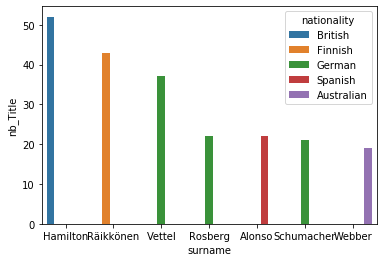

In [133]:
sns.barplot(x="surname", y="nb_Title", hue="nationality", data=df)
from IPython.core.display import HTML as Center
init_notebook_mode(connected=True)

display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

  > #### c- Classement historique des écuries

Les pilotes ne roulent cependant pas tous seuls. Ils sont employés par des écuries qui mettent leur ingéniosité à la construction de leurs bolides. Il nous a paru donc logique de nous intéresser à l'évolution des classements des écuries sachant par contre qu'il existe un gap assez important entre les écuries historiques comme l'italien Ferrari, le britannique McLaren et l'allemand Mercedes qui font rouler des pilotes de qualité depuis plus d'un demi-siécle. 
Afin d'extraire cette information nous utilisons de nouveau des commandes simples empruntés de SQL avec un schéma de la sorte : Select -> Count -> Match -> relationship -> Group By -> Order By. De simples commandes python suffisent par la suite à créer le dataframe avec le nombre de victoires par année pour chaque écurie

In [90]:
cons_res = client.command("SELECT co.cons_name as name, ra.year as year, count(r) as nb_victories FROM" 
	"(MATCH {class: Races, as: ra}<-results_of-{class: Results, as: r, WHERE : (rank=1)}<-c_results-{class: Constructors, as: co}"
      "Return co,ra, r) GROUP BY co.cons_name, ra.year ORDER BY ra.year desc")
values_dict = []
keys_dict = []
pilots_list = []

for i in range(len(cons_res)):
    pilots_list.append(cons_res[i].__dict__)
    values_dict.append(list(pilots_list[i]["_OrientRecord__o_storage"].values()))
    df = pd.DataFrame(values_dict)
    
keys_dict = list(pilots_list[2]["_OrientRecord__o_storage"].keys())
df.columns = keys_dict
end2 = tm.time()
df.sort_values('nb_victories')
df

,name,year,nb_victories
0,BMW Sauber,2008,2
1,Renault,2009,2
2,Renault,2005,3
3,Renault,2006,5
4,Mercedes,2016,9
...,...,...,...
69,Sauber,2012,2
70,McLaren,2010,6
71,Ferrari,2007,12
72,Ferrari,2008,13


La même logique est utilisée dans Neo4J sans la commande Select. 

In [148]:
graph_db.run("Match (c:Constructor)-[:`c_results`]-(res:Result {rank:'1'})," 
                "(res:Result {rank:'1'})-[:`results_if`]-(r:Race)" 
                "Return c.name as name , r.year as year ,count(res) as nb_victories ORDER BY nb_victories desc") 

 name       | year | nb_victories 
------------|------|--------------
 "Ferrari"  | 2004 |           14 
 "Ferrari"  | 2008 |           13 
 "Mercedes" | 2015 |           13 

Afin de valoriser ces données nous optons pour une visualisation de séries temporelles qui prend de plus en plus de l'importance en data sciences : les race bar chart. 

#### XXXXXX faire ce foutu graph ici XXXXX

Comment race bar chart 

  > #### d- Shortest paths - visualisation réseau 

Que serait ce travail sur des SGBD orientés graphes sans la recherche chemins le plus rapide ? Cette fonctionalité a permis le passage à l'échelle de ces technologies dans des domaines comme la biologie où les bioinformaticiens cherchent les voies de régulations de certains procédés métaboliques complexes (comme la néoglucogenèse). Dans notre exemple nous cherchons nous le chemin le plus cours entre l'écurie Mercedes et le circuit turc Istanbul Park. 
Malheursement les développeurs des drivers pyorient et py2neo n'ont pas ajouté de fonctionalités permettant de représenter directement sur Python les graphes disponible dans les desktops d'Orientdb et de Neo4J. Aussi, même la requête de type graphe ne semble pas être pris en charge d'après nos recherches. Si cela avait été le cas, nous aurions utilisé la librarie [networkx](https://networkx.org/documentation/stable/tutorial.html) pour représenter des réseau interactives. 
À défaut de vous proposer des graphes interactives de nos chemins les plus courts, nous vous proposer des captures d'écran de nos desktop correspondant aux résultats de nos requêtes.<br>

Sur orientdb la fonction shortestPath retourne facilement le chemin le plus court entre deux noeuds.

In [1]:
%%script false --no-raise-error # commande pour ne pas exécuter cette ligne de code 
client.command("SELECT expand(path) FROM (SELECT shortestPath((SELECT FROM Constructors WHERE cons_name='Mercedes'), 
                                             "(SELECT FROM Circuits WHERE name='Istanbul Park')) AS path 
                                              "UNWIND path"
                                             )

Nous vous proposons de plus ici une alternative à la fonction Select pour désigner les noeuds de départ et d'arrivée. Il s'agit d'utiliser littéralement les "built-in id" d'OrientDB appelés les @rid pour "record id". Ainsi chaque donnée ayant un id spécifique créée par le SGBD lui même vous pourrez, si votre but de réduire le vocabulaire de vos requêtes, les passer à vos fonctions. Vous aurez le même résultat. La figure 6 montre le chemin le plus court entre Mercedes et Istanbul Park avec 2 noeuds intermédiaires.  

In [144]:
%%script false --no-raise-error
client.command("SELECT expand(path) FROM(SELECT shortestPath(#23:20, #26:17) AS path UNWIND path");

<img src="sp_odb.png" width="1100" height="400">

<center> Figure 6 : Capture d'écran du chemin le plus court Mercedes-Istanbul Park avec OrientDB Studio  </center> 

La même commande sur Neo4J nécessite beaucoup moins de code et semble un peu plus comprehensible pour un non initié. Le résultat présenté figure 7 est le même que celui obtenu avec orientdb. 

In [134]:
graph_db.run("EXPLAIN MATCH (e:Constructor {name:'Mercedes'}), (c:Circuit {name:'Istanbul Park'}), p=shortestpath((e)-[*]-(c)) Return p")

<img src="sp_neo4J.png" width="1100" height="400">

<center> Figure 7 : Capture d'écran du chemin le plus court Mercedes-Istanbul Park avec Neo4J Studio  </center> 

## 3. <u>**Conclusion sur la comparaison et Limites de notre approche**<u> 

a- Comparaison sur des points précis  

Nous l'avons vu dans la seconde partie de ce rapport; ces deux systèmes de gestion de base de données sont semblables à bien des égards. Ceci dans la logique de création de bases de données en définissant d'abord les noeuds puis les relations qui les lient mais aussi dans la construction des requêtes. Ce qui semble normal vu qu'ils utilisent tous deux la théorie du stockage de données dans des objets de types graphes avec une programmation totalement orientée objets. Dès lors nous avons, afin d'enrichir cette comparaison, identifié 5 points qui pour nous sont pertinents pour des SGBD devant gérer des données massives. Il s'agit : 
- du temps de calcul (pour créer entièrement la base de donnée et retourner les résultats des requêtes);
- de l'utilisation du mémoire ordinateur;
- de l'intuitivité;
- de la disponibilité des aides et de la communauté;
- des outils spécifiques permettant à un SGBD de gérer des données massives; 

Dans cette partie de notre rapport nous veillons aussi de mettre en commun les expériences que chacun des deux étudiants ayant travaillé sur l'un ou l'autre SGBD. Il s'agit donc au delà des chiffres plus d'une synthèse de ce que nous avons expérimenté. 

#### - Temps de calcul 

Comme l'ont montré les chiffres de temps dee création de base de données, Neo4j plus puissant pour prendre en considération tous les deux et les lier entre avec des relations. Pyorient a effet souffert pour créer les relations impliquant la table Results (très lourde) ceci même en utilisant du Batch. Cependant comme nous l'avons vu dans la fin de la partie 2.b pyorient n'a pas réellement pour vocation de créer une base de donnée à partir de données partagées dans des tables csv. L'équipe de développement préconise surtout de l'ETL qui pour nous se fait en quelques seconds à partir de l'invite de commande. Nous ne recommendons donc pas d'utiliser pyorient pour créer votre bae de donnée mais plutôt de l'ETL. Neo4j propose aussi dans son desktop de faire de l'ETL mais aussi d'utiliser des "bulk insert" qui sont des équivalents du Batch sur OrientDB. 
Quoi qu'il en soit pour nous py2neo a sur ce point de la vitesse et du temps de calcul plus intéressant. Concernant les délais de retour des requêtes, nous préferrons ne pas nous avancer sur des conclusions au vu de la simplificité des tâches que nous demandions aux deux SGBD. Il faudrait en effet pour cela des requêtes qui demandent plus de travail aux SGBD et qui ne prennent pas en moyenne 0.2s. 

- Comparaison sur l'utilisation de la mémoire ordinateur 

Concernant l'utilisation de la mémoire ordinateur, il semblerait que les deux SGBD soient tout aussi semblables. Cependant, nous souhaitons aussi relativiser ce résultat sachant que la gestion de la mémoire par neo4j calculée a pu être altérée par celle d'orientdb. Cependant, nos [recherches](https://www.arangodb.com/2018/02/nosql-performance-benchmark-2018-mongodb-postgresql-orientdb-neo4j-arangodb/#Memory) ont montré qu'OrientDB est beaucoup plus performant que Neo4j sur ce point.  

In [51]:
memory_use_orientdb

NameError: name 'memory_use_orientdb' is not defined

In [50]:
memory_use_neo4j

NameError: name 'memory_use_neo4j' is not defined

- Intuitivité // Facilité de la prise en main 

Ce point est extrêmement important pour nous qui sommes pour la plupart issus de cursus autres que l'informatique pur. De fait, un SGBD doit pouvoir nous permettre de maniière assez et efficace de créer, lire et requêter une base de donnée sans pour autant avoir à appréhender certaines concepts mathématiques complexes sous-tendent l'informatique. Pour nous ces deux SGBD ont réussi ce pari. Que cela soit pour l'utilisation d'objets géométriques de types graphes ou la prise en main des versions Desktop (studios) qui sont tous les deux user-friendly. Néanmoins, notre expérience de Neo4j avec py2neo a été plus agréable. Malgré qu'Orientdb soit très puissant il est nécessaire pour certains tâches de s'y prendre à plusieurs reprises pour en comprendre réellement le sens et ne plus faire certaines erreurs. 

- Communauté // Aide en ligne // Accessibilité de la documentation 

Nous pensons aussi en tant qu'apprentis data scientists il est très important de pouvoir avoir l'aide quand on rencontre certaines erreurs. Lors de ces situations notre premier réflexe est sans nul doute de copier l'erreur directement dans Google et de nous retrouver sur Stackoverflow ou sur la partie "issues" du github de la technologie avec laquelle nous travaillons. Et sur ce point Neo4j remporte la compétition haut la main. La communauté Neo4j est extrêmement active et coopérative. Elle est sûrement à l'origine du succés de cette technologie. La figure suivante présente de le nombre de questions des tags [orientdb](https://stackoverflow.com/questions/tagged/orientdb) et [neo4j](https://stackoverflow.com/questions/tagged/neo4j) sur stackoverflow ainsi que le nombre de répertoires github impliquant les SGBD.

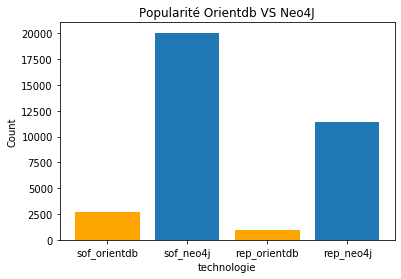

In [49]:
from matplotlib import pyplot as plt
sof_orientdb = 2667
sof_neo4j = 20053
rep_orientdb = 947
rep_neo4j = 11464
# sof pour stackoverflow et rep comme répertoire sur github
x = ["sof_orientdb", "sof_neo4j", "rep_orientdb", "rep_neo4j"]
y = [2667, 20053, 947, 11464]

bars = plt.bar(x, y)
bars[0].set_color('orange')
bars[2].set_color('orange')
plt.xlabel('technologie')
plt.ylabel('Count')
plt.title('Popularité Orientdb VS Neo4J')
plt.show()

La popularité de Neo4j est sans conteste. D'autant plus, les deux technologies ont toutes deux été lancées début 2010. Nos interrogations par rapport à OrientDB ont eu plus de mal a trouvé réponses et nous avons rencontré quelques difficultés pour la prise en main. Cependant, passé cette première étape et à l'aide de nos bases en SQL nous arrivons très facilement à nous débrouiller avec la technologie. La documentation d'OrientDB est aussi très compléte et montre grâce à des exemples simples l'implémentation de toutes les fonctionnalités proposées.  

- Big data tools  Mapreduce toussa toussa

Les données massives étant l'objet de ce cours, nous souhaitons consacré cette dernière partie aux fonctionnalités proposées par chacun des deux SGBD pour les manipuler. 
Grâce à leur structure en graph les deux techologies gérent assez bien d'importantes quantités de données et leur visualisation rapide. OrientDB donne la possibilité d'utiliser une fonctionalité en architecture distribuée appelée Sharding (partitionnement direct en français). Il s'agit d'une méthode de morcelement d'une classe de données sur plusieurs noeuds appelés **shards**. Et contrairement à une simple réplication, la classe possède son cluster par défaut sur un des noeuds qui est le seul point d'entrée pour traiter les données de ladite classe. Les manipulations se font dans le périmètre de ce cluster puis les réplicats sont mis à jour. Chaque cluster dans ce ca être attribué à un ou plusieurs serveurs. Ceci permet d'utiliser toute la puissance de l'architecture distribué du SGBD. OrientDB supporte aussi le MapReduce sans usage de Hadoop qui plus est. Ici des requêtes SQL simples et verbalement parlant sont utilisés. Cette technique est utilisée lorsque plusieurs clusters ou shards sont impliqués dans une requête. Orientdb exécute la requête dans tous les clusters (shards) impliqués, il s'agit de l'étape MAP puis regroupe tous les résultats, c'est le REDUCE. Notre jeu de données ne se prétant pas à cette opération nous vous renvoyons vers la documentation d'OrientDB pour un exemple d'application [ici](https://orientdb.com/docs/2.2.x/Distributed-Sharding.html#mapreduce). Neo4j ne propose pas de méthodes de MapReduce. Même si il est possible de contourner cette limitation en  utilisant Hadoop comme orchestrateur. 

- En résumé 

Tableau comparatif final ici

b- Limites de notre approche 

Notre comparaison semble avoir montré quelques points de dvergence assez importants entre ces deux SGBD-G. Toutefois, nous pensons que notre approche comporte certaines limites dont nous sommes bien conscient. Nous les listons ici : <br>
- nous avons débuté cette comparaison en ayant d'abord était initié à Neo4j lors d'une séance de travaux dirigés, nos connaissances à priori plus importantes de ce SGBD par rapport à OrientDB a sûrement biaisé certaines de nos conclusions;  
- le dataset employé pour cette comparaison ne correspond pas vraiment aux caractéristiques du Big data. Il aurait peut-être fallu des données plus importantes pour pouvoir exploiter au mieux les capacités de nos deux SGBD;
- l'importation des données sur OrientDB se fait principalement avec de l'ETL, donc ce SGBD est peut-être parti avec un léger handicap; 
- les deux étudiants ayant travaillé avec l'un ou l'autre SGBD n'ont pas reçu les mêmes capacités en programmation sur Python. De fait, leurs habilités à implenter de manière efficace les possibilités de leur driver python respectif n'ont pas été similaires. Ce qui a peut-être pu défavoriser d'une façon ou d'une autre l'un des SGBD;

## <u>**Conclusion**<u> 

En définitive, nous pensons nous que Neo4j reste le SGBD de référence pour les bases de données orientées graphes. Cependant, l'absence de technologie claire permettant de faire du MapReduce lui fait perdre quelques points par rapport aux autres SGBD simalaires. OrientDB est une fantastique technologie capable de gérer trés simplement des données massives. Sa version desktop OrientDB Studio est trés agréable et facile d'utilisation offre la possibilité de visualiser plus facilement les graphes. Les deux technologies se valeent et offre toutes deux des fonctionnalités trés intéressantes. <br>
Ce travail nous a permis de découvrir un peu plus les SGBDs graphes et leur fonctionnement. Mais aussi de parfaire nos capacités de prise en main d'une question en Data Sciences et plus généralement de programmation avec Python, Cypher et SQL. 

<br>
<br>
<br>






Références:

https://www.irit.fr/~Thierry.Millan/MemoiresENG221/Nicolas_vergnes.pdf <br>
https://orientdb.com/docs/2.2.x/PyOrient.html <br>
https://neo4j.com/developer/get-started/ <br>
https://www.udemy.com/join/login-popup/?next=/course/orientdb-getting-started/learn/lecture/1726168#overview <br>